In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data_info = pd.read_csv('/content/sample_data/lending_club_info.csv',index_col='LoanStatNew')

In [ ]:
data_info.Description['term']

'The number of payments on the loan. Values are in months and can be either 36 or 60.'

In [ ]:
def feat_info(col):
  return data_info.Description[col]

In [ ]:
feat_info('loan_status')

'Current status of the loan'

In [ ]:
df = pd.read_csv('/content/sample_data/lending_club_loan_two.csv')

In [ ]:
df.head()

loan_amnt        term  int_rate  installment grade sub_grade  \
0    10000.0   36 months     11.44       329.48     B        B4   
1     8000.0   36 months     11.99       265.68     B        B5   
2    15600.0   36 months     10.49       506.97     B        B3   
3     7200.0   36 months      6.49       220.65     A        A2   
4    24375.0   60 months     17.27       609.33     C        C5   

                 emp_title emp_length home_ownership  annual_inc  ...  \
0                Marketing  10+ years           RENT    117000.0  ...   
1          Credit analyst     4 years       MORTGAGE     65000.0  ...   
2             Statistician   < 1 year           RENT     43057.0  ...   
3          Client Advocate    6 years           RENT     54000.0  ...   
4  Destiny Management Inc.    9 years       MORTGAGE     55000.0  ...   

  open_acc pub_rec revol_bal revol_util total_acc  initial_list_status  \
0     16.0     0.0   36369.0       41.8      25.0                    w   
1     17.0     0.0   20131.0       53.3      27.0                    f   
2     13.0     0.0   11987.0       92.2      26.0                    f   
3      6.0     0.0    5472.0       21.5      13.0                    f   
4     13.0     0.0   24584.0       69.8      43.0                    f   

  application_type  mort_acc  pub_rec_bankruptcies  \
0       INDIVIDUAL       0.0                   0.0   
1       INDIVIDUAL       3.0                   0.0   
2       INDIVIDUAL       0.0                   0.0   
3       INDIVIDUAL       0.0                   0.0   
4       INDIVIDUAL       1.0                   0.0   

                                           address  
0     0174 Michelle Gateway\nMendozaberg, OK 22690  
1  1076 Carney Fort Apt. 347\nLoganmouth, SD 05113  
2  87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113  
3            823 Reid Ford\nDelacruzside, MA 00813  
4             679 Luna Roads\nGreggshire, VA 11650  

[5 rows x 27 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

In [ ]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
dtype: int64

<Axes: xlabel='loan_status', ylabel='count'>

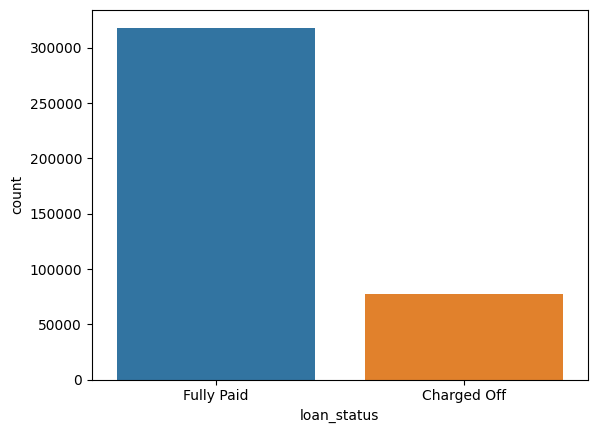

In [ ]:
sns.countplot(x='loan_status',data=df)

In [ ]:
plt.figure(figsize=(12,7))
sns.countplot(x='sub_grade',hue='loan_status',data=df)

<Axes: xlabel='sub_grade', ylabel='count'>

In [ ]:
ord = sorted(df['sub_grade'].unique())

<Axes: xlabel='loan_amnt', ylabel='Count'>

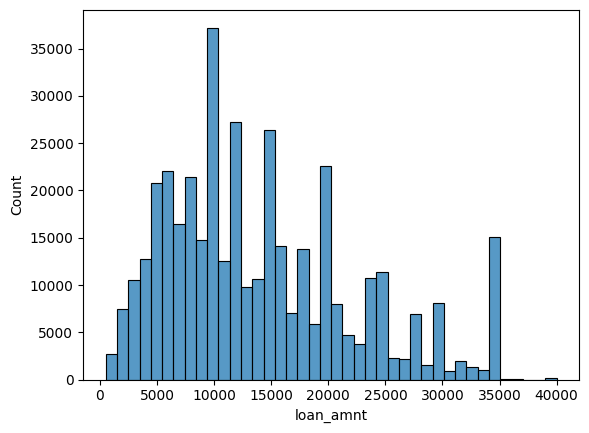

In [ ]:
sns.histplot(df['loan_amnt'],kde=False,bins=40)

In [ ]:
df.corr()

<ipython-input-50-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


loan_amnt  int_rate  installment  annual_inc       dti  \
loan_amnt              1.000000  0.168921     0.953929    0.336887  0.016636   
int_rate               0.168921  1.000000     0.162758   -0.056771  0.079038   
installment            0.953929  0.162758     1.000000    0.330381  0.015786   
annual_inc             0.336887 -0.056771     0.330381    1.000000 -0.081685   
dti                    0.016636  0.079038     0.015786   -0.081685  1.000000   
open_acc               0.198556  0.011649     0.188973    0.136150  0.136181   
pub_rec               -0.077779  0.060986    -0.067892   -0.013720 -0.017639   
revol_bal              0.328320 -0.011280     0.316455    0.299773  0.063571   
revol_util             0.099911  0.293659     0.123915    0.027871  0.088375   
total_acc              0.223886 -0.036404     0.202430    0.193023  0.102128   
mort_acc               0.222315 -0.082583     0.193694    0.236320 -0.025439   
pub_rec_bankruptcies  -0.106539  0.057450    -0.098628   -0.050162 -0.014558   

                      open_acc   pub_rec  revol_bal  revol_util  total_acc  \
loan_amnt             0.198556 -0.077779   0.328320    0.099911   0.223886   
int_rate              0.011649  0.060986  -0.011280    0.293659  -0.036404   
installment           0.188973 -0.067892   0.316455    0.123915   0.202430   
annual_inc            0.136150 -0.013720   0.299773    0.027871   0.193023   
dti                   0.136181 -0.017639   0.063571    0.088375   0.102128   
open_acc              1.000000 -0.018392   0.221192   -0.131420   0.680728   
pub_rec              -0.018392  1.000000  -0.101664   -0.075910   0.019723   
revol_bal             0.221192 -0.101664   1.000000    0.226346   0.191616   
revol_util           -0.131420 -0.075910   0.226346    1.000000  -0.104273   
total_acc             0.680728  0.019723   0.191616   -0.104273   1.000000   
mort_acc              0.109205  0.011552   0.194925    0.007514   0.381072   
pub_rec_bankruptcies -0.027732  0.699408  -0.124532   -0.086751   0.042035   

                      mort_acc  pub_rec_bankruptcies  
loan_amnt             0.222315             -0.106539  
int_rate             -0.082583              0.057450  
installment           0.193694             -0.098628  
annual_inc            0.236320             -0.050162  
dti                  -0.025439             -0.014558  
open_acc              0.109205             -0.027732  
pub_rec               0.011552              0.699408  
revol_bal             0.194925             -0.124532  
revol_util            0.007514             -0.086751  
total_acc             0.381072              0.042035  
mort_acc              1.000000              0.027239  
pub_rec_bankruptcies  0.027239              1.000000

<ipython-input-51-dc13eabd7874>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True,cmap='coolwarm')


<Axes: >

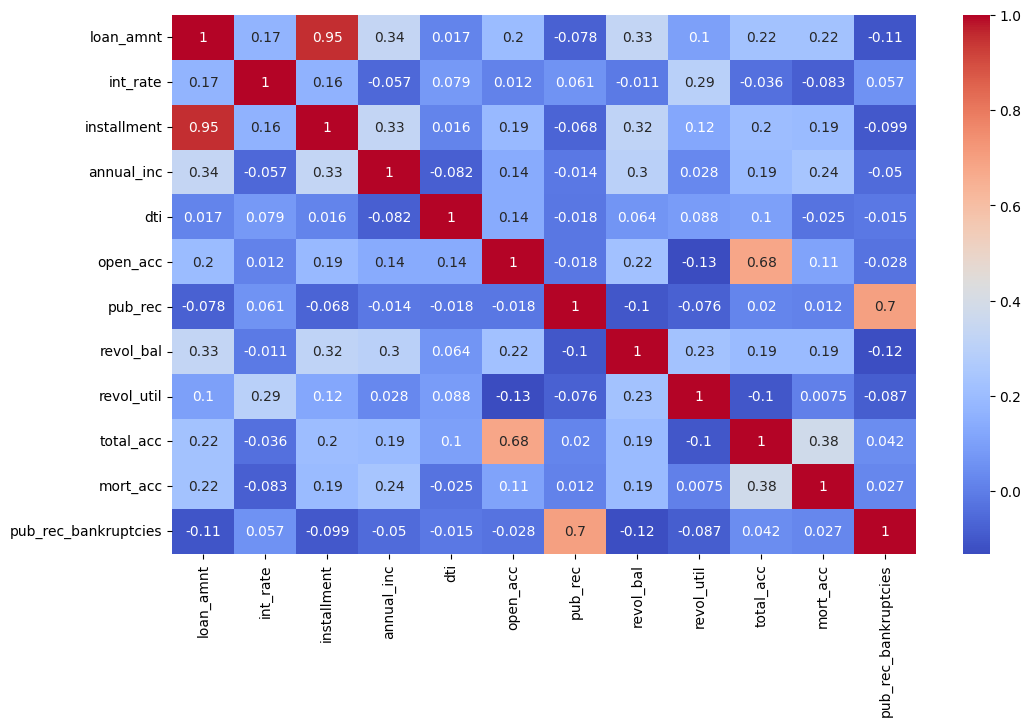

In [ ]:
plt.figure(figsize=(12,7))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')

In [ ]:
feat_info('installment')

'The monthly payment owed by the borrower if the loan originates.'

In [ ]:
feat_info('loan_amnt')

'The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.'

<Axes: xlabel='installment', ylabel='loan_amnt'>

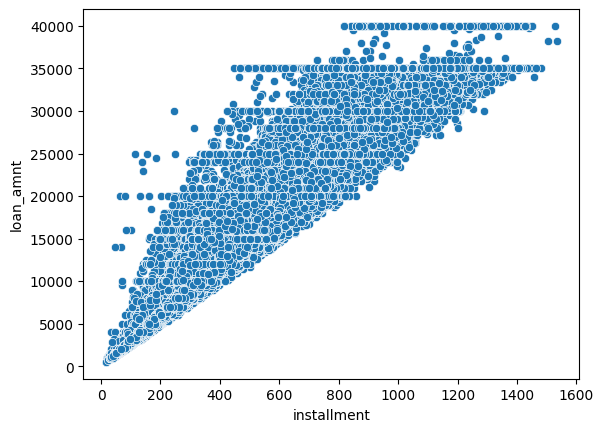

In [ ]:
sns.scatterplot(x='installment',y='loan_amnt',data=df)

<Axes: xlabel='loan_status', ylabel='loan_amnt'>

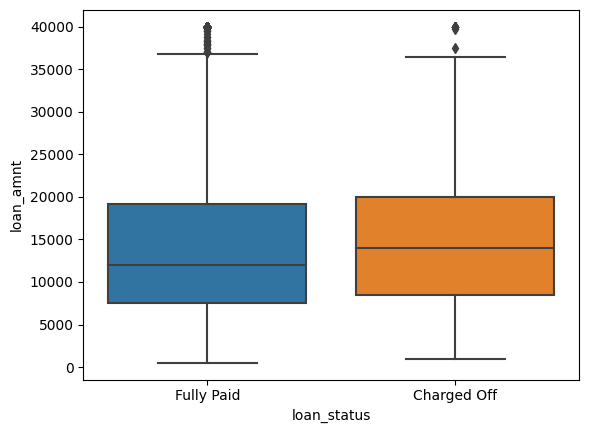

In [ ]:
sns.boxplot(x='loan_status',y='loan_amnt',data=df)

In [ ]:
df.groupby('loan_status')['loan_amnt'].describe()

count          mean          std     min     25%      50%  \
loan_status                                                                 
Charged Off   77673.0  15126.300967  8505.090557  1000.0  8525.0  14000.0   
Fully Paid   318357.0  13866.878771  8302.319699   500.0  7500.0  12000.0   

                 75%      max  
loan_status                    
Charged Off  20000.0  40000.0  
Fully Paid   19225.0  40000.0

<Axes: xlabel='grade', ylabel='count'>

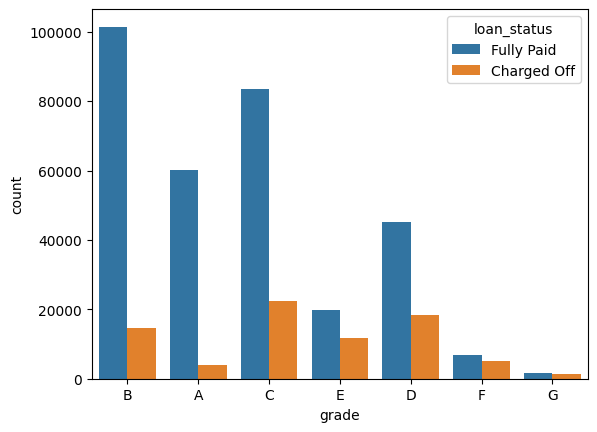

In [ ]:
sns.countplot(x='grade',data=df,hue='loan_status')

In [ ]:
df['loan_status'].value_counts()

Fully Paid     318357
Charged Off     77673
Name: loan_status, dtype: int64

In [ ]:
df['loan_repaid'] = df['loan_status'].map({'Fully Paid':1,'Charged Off':0})

In [ ]:
df.head(2)

loan_amnt        term  int_rate  installment grade sub_grade  \
0    10000.0   36 months     11.44       329.48     B        B4   
1     8000.0   36 months     11.99       265.68     B        B5   

         emp_title emp_length home_ownership  annual_inc  ... pub_rec  \
0        Marketing  10+ years           RENT    117000.0  ...     0.0   
1  Credit analyst     4 years       MORTGAGE     65000.0  ...     0.0   

  revol_bal revol_util total_acc initial_list_status  application_type  \
0   36369.0       41.8      25.0                   w        INDIVIDUAL   
1   20131.0       53.3      27.0                   f        INDIVIDUAL   

  mort_acc  pub_rec_bankruptcies  \
0      0.0                   0.0   
1      3.0                   0.0   

                                           address  loan_repaid  
0     0174 Michelle Gateway\nMendozaberg, OK 22690            1  
1  1076 Carney Fort Apt. 347\nLoganmouth, SD 05113            1  

[2 rows x 28 columns]

In [ ]:
df.corr()['loan_repaid'].sort_values().drop('loan_repaid')

<ipython-input-61-e703f9ac8fb7>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['loan_repaid'].sort_values().drop('loan_repaid')


int_rate               -0.247758
revol_util             -0.082373
dti                    -0.062413
loan_amnt              -0.059836
installment            -0.041082
open_acc               -0.028012
pub_rec                -0.019933
pub_rec_bankruptcies   -0.009383
revol_bal               0.010892
total_acc               0.017893
annual_inc              0.053432
mort_acc                0.073111
Name: loan_repaid, dtype: float64

<ipython-input-62-84269d723ac1>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['loan_repaid'].sort_values().drop('loan_repaid').plot(kind='bar')


<Axes: >

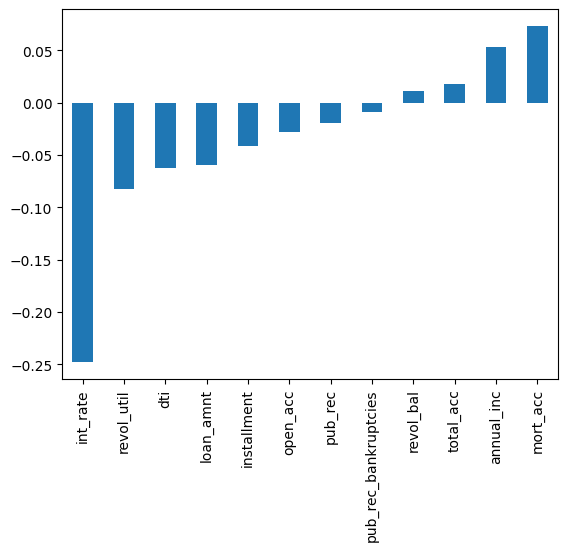

In [ ]:
df.corr()['loan_repaid'].sort_values().drop('loan_repaid').plot(kind='bar')

In [ ]:
df.head()

loan_amnt        term  int_rate  installment grade sub_grade  \
0    10000.0   36 months     11.44       329.48     B        B4   
1     8000.0   36 months     11.99       265.68     B        B5   
2    15600.0   36 months     10.49       506.97     B        B3   
3     7200.0   36 months      6.49       220.65     A        A2   
4    24375.0   60 months     17.27       609.33     C        C5   

                 emp_title emp_length home_ownership  annual_inc  ... pub_rec  \
0                Marketing  10+ years           RENT    117000.0  ...     0.0   
1          Credit analyst     4 years       MORTGAGE     65000.0  ...     0.0   
2             Statistician   < 1 year           RENT     43057.0  ...     0.0   
3          Client Advocate    6 years           RENT     54000.0  ...     0.0   
4  Destiny Management Inc.    9 years       MORTGAGE     55000.0  ...     0.0   

  revol_bal revol_util total_acc initial_list_status  application_type  \
0   36369.0       41.8      25.0                   w        INDIVIDUAL   
1   20131.0       53.3      27.0                   f        INDIVIDUAL   
2   11987.0       92.2      26.0                   f        INDIVIDUAL   
3    5472.0       21.5      13.0                   f        INDIVIDUAL   
4   24584.0       69.8      43.0                   f        INDIVIDUAL   

  mort_acc  pub_rec_bankruptcies  \
0      0.0                   0.0   
1      3.0                   0.0   
2      0.0                   0.0   
3      0.0                   0.0   
4      1.0                   0.0   

                                           address  loan_repaid  
0     0174 Michelle Gateway\nMendozaberg, OK 22690            1  
1  1076 Carney Fort Apt. 347\nLoganmouth, SD 05113            1  
2  87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113            1  
3            823 Reid Ford\nDelacruzside, MA 00813            1  
4             679 Luna Roads\nGreggshire, VA 11650            0  

[5 rows x 28 columns]

In [ ]:
len(df)

396030

In [ ]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

In [ ]:
100* df.isnull().sum()/len(df)

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               5.789208
emp_length              4.621115
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.443148
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                9.543469
pub_rec_bankruptcies    0.135091
address                 0.000000
loan_repaid             0.000000
dtype: float64

In [ ]:
df['emp_title'].nunique()

173105

In [ ]:
df['emp_title'].value_counts()

Teacher                    4389
Manager                    4250
Registered Nurse           1856
RN                         1846
Supervisor                 1830
                           ... 
Postman                       1
McCarthy & Holthus, LLC       1
jp flooring                   1
Histology Technologist        1
Gracon Services, Inc          1
Name: emp_title, Length: 173105, dtype: int64

In [ ]:
df = df.drop('emp_title',axis=1)

In [ ]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

In [ ]:
df['emp_length'].value_counts()

10+ years    126041
2 years       35827
< 1 year      31725
3 years       31665
5 years       26495
1 year        25882
4 years       23952
6 years       20841
7 years       20819
8 years       19168
9 years       15314
Name: emp_length, dtype: int64

<Axes: xlabel='emp_length', ylabel='count'>

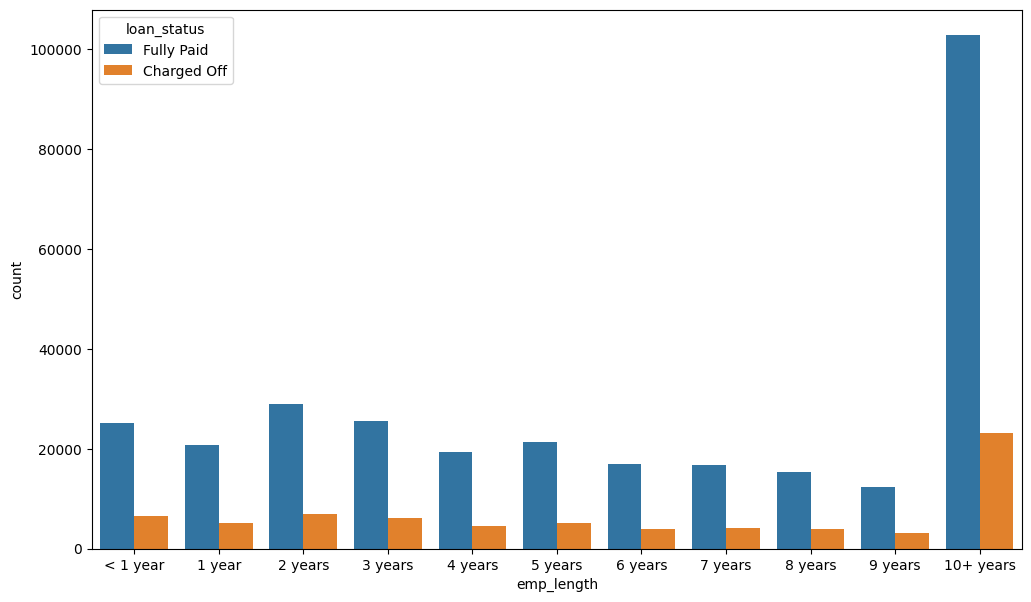

In [ ]:
plt.figure(figsize=(12,7))
sort_ord = ['< 1 year','1 year','2 years','3 years', '4 years','5 years' ,'6 years','7 years','8 years', '9 years','10+ years']
sns.countplot(x='emp_length',data=df,hue='loan_status',order = sort_ord)

In [ ]:
df['emp_length'].unique()

array(['10+ years', '4 years', '< 1 year', '6 years', '9 years',
       '2 years', '3 years', '8 years', '7 years', '5 years', '1 year',
       nan], dtype=object)

In [ ]:
emp_co = df[df['loan_status']=='Charged Off'].groupby('emp_length').count()['loan_status']

In [ ]:
emp_fp = df[df['loan_status']=='Fully Paid'].groupby('emp_length').count()['loan_status']

In [ ]:
emp_len = emp_co/(emp_co+emp_fp)

<Axes: xlabel='emp_length'>

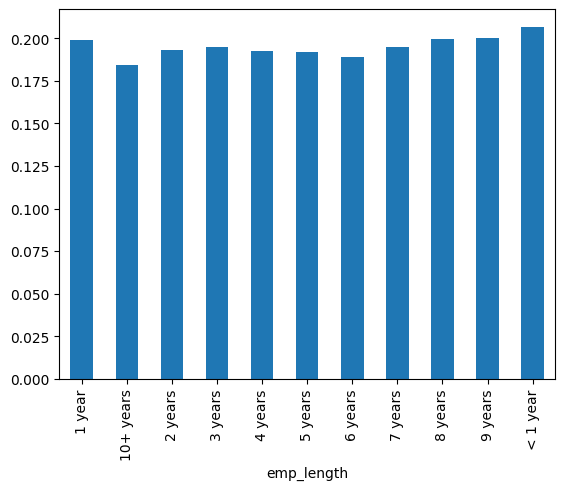

In [ ]:
emp_len.plot(kind='bar')

In [ ]:
df = df.drop('emp_length',axis=1)

In [ ]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

In [ ]:
df['title'].value_counts()

Debt consolidation            152472
Credit card refinancing        51487
Home improvement               15264
Other                          12930
Debt Consolidation             11608
                               ...  
Graduation/Travel Expenses         1
Daughter's Wedding Bill            1
gotta move                         1
creditcardrefi                     1
Toxic Debt Payoff                  1
Name: title, Length: 48817, dtype: int64

In [ ]:
df['purpose'].value_counts()

debt_consolidation    234507
credit_card            83019
home_improvement       24030
other                  21185
major_purchase          8790
small_business          5701
car                     4697
medical                 4196
moving                  2854
vacation                2452
house                   2201
wedding                 1812
renewable_energy         329
educational              257
Name: purpose, dtype: int64

In [ ]:
df = df.drop('title',axis=1)

In [ ]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

In [ ]:
df['mort_acc'].value_counts()

0.0     139777
1.0      60416
2.0      49948
3.0      38049
4.0      27887
5.0      18194
6.0      11069
7.0       6052
8.0       3121
9.0       1656
10.0       865
11.0       479
12.0       264
13.0       146
14.0       107
15.0        61
16.0        37
17.0        22
18.0        18
19.0        15
20.0        13
24.0        10
22.0         7
21.0         4
25.0         4
27.0         3
32.0         2
31.0         2
23.0         2
26.0         2
28.0         1
30.0         1
34.0         1
Name: mort_acc, dtype: int64

In [ ]:
df.corr()['mort_acc'].sort_values()

<ipython-input-91-08a22ffe92b2>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['mort_acc'].sort_values()


int_rate               -0.082583
dti                    -0.025439
revol_util              0.007514
pub_rec                 0.011552
pub_rec_bankruptcies    0.027239
loan_repaid             0.073111
open_acc                0.109205
installment             0.193694
revol_bal               0.194925
loan_amnt               0.222315
annual_inc              0.236320
total_acc               0.381072
mort_acc                1.000000
Name: mort_acc, dtype: float64

In [ ]:
total_acc_avg = df.groupby('total_acc').mean()['mort_acc']

<ipython-input-94-d5f3724f8e1b>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  total_acc_avg = df.groupby('total_acc').mean()['mort_acc']


In [ ]:
def fill_mort(total_acc,mort_acc):
  if np.isnan(mort_acc):
    return total_acc_avg[total_acc]
  else:
    return mort_acc

In [ ]:
df['mort_acc'] = df.apply(lambda x:fill_mort(x['total_acc'],x['mort_acc']),axis=1)

In [ ]:
df.isnull().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
address                 0
loan_repaid             0
dtype: int64

In [ ]:
df = df.dropna()

In [ ]:
df.select_dtypes(['object']).columns

Index(['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'earliest_cr_line',
       'initial_list_status', 'application_type', 'address'],
      dtype='object')

In [ ]:
df['term'].value_counts()

36    301247
60     93972
Name: term, dtype: int64

In [ ]:
df['term'] = df['term'].apply(lambda term:int(term[:3]))

<ipython-input-106-8c8c9f410536>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['term'] = df['term'].apply(lambda term:int(term[:3]))


In [ ]:
df = df.drop('grade',axis=1)

In [ ]:
dummies = pd.get_dummies(df['sub_grade'],drop_first=True)

In [ ]:
df = pd.concat([df.drop('sub_grade',axis=1),dummies],axis=1)

In [ ]:
df.head()

loan_amnt  term  int_rate  installment home_ownership  annual_inc  \
0    10000.0    36     11.44       329.48           RENT    117000.0   
1     8000.0    36     11.99       265.68       MORTGAGE     65000.0   
2    15600.0    36     10.49       506.97           RENT     43057.0   
3     7200.0    36      6.49       220.65           RENT     54000.0   
4    24375.0    60     17.27       609.33       MORTGAGE     55000.0   

  verification_status   issue_d  loan_status             purpose  ...  F1 F2  \
0        Not Verified  Jan-2015   Fully Paid            vacation  ...   0  0   
1        Not Verified  Jan-2015   Fully Paid  debt_consolidation  ...   0  0   
2     Source Verified  Jan-2015   Fully Paid         credit_card  ...   0  0   
3        Not Verified  Nov-2014   Fully Paid         credit_card  ...   0  0   
4            Verified  Apr-2013  Charged Off         credit_card  ...   0  0   

   F3  F4  F5  G1  G2 G3 G4  G5  
0   0   0   0   0   0  0  0   0  
1   0   0   0   0   0  0  0   0  
2   0   0   0   0   0  0  0   0  
3   0   0   0   0   0  0  0   0  
4   0   0   0   0   0  0  0   0  

[5 rows x 57 columns]

In [ ]:
dummies = pd.get_dummies(df[['verification_status','application_type','purpose','initial_list_status']],drop_first=True)

In [ ]:
df = pd.concat([df.drop(['verification_status','application_type','purpose','initial_list_status'],axis=1),dummies],axis=1)

In [ ]:
df.head()

loan_amnt  term  int_rate  installment home_ownership  annual_inc  \
0    10000.0    36     11.44       329.48           RENT    117000.0   
1     8000.0    36     11.99       265.68       MORTGAGE     65000.0   
2    15600.0    36     10.49       506.97           RENT     43057.0   
3     7200.0    36      6.49       220.65           RENT     54000.0   
4    24375.0    60     17.27       609.33       MORTGAGE     55000.0   

    issue_d  loan_status    dti earliest_cr_line  ...  purpose_house  \
0  Jan-2015   Fully Paid  26.24         Jun-1990  ...              0   
1  Jan-2015   Fully Paid  22.05         Jul-2004  ...              0   
2  Jan-2015   Fully Paid  12.79         Aug-2007  ...              0   
3  Nov-2014   Fully Paid   2.60         Sep-2006  ...              0   
4  Apr-2013  Charged Off  33.95         Mar-1999  ...              0   

   purpose_major_purchase  purpose_medical  purpose_moving  purpose_other  \
0                       0                0               0              0   
1                       0                0               0              0   
2                       0                0               0              0   
3                       0                0               0              0   
4                       0                0               0              0   

   purpose_renewable_energy  purpose_small_business purpose_vacation  \
0                         0                       0                1   
1                         0                       0                0   
2                         0                       0                0   
3                         0                       0                0   
4                         0                       0                0   

   purpose_wedding  initial_list_status_w  
0                0                      1  
1                0                      0  
2                0                      0  
3                0                      0  
4                0                      0  

[5 rows x 71 columns]

In [ ]:
df['home_ownership'].value_counts()

MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          142
Name: home_ownership, dtype: int64

In [ ]:
df['home_ownership'] = df['home_ownership'].replace(['NONE','ANY'],'OTHER')

In [ ]:
dummies = pd.get_dummies(df['home_ownership'],drop_first=True)

In [ ]:
df = pd.concat([df.drop('home_ownership',axis=1),dummies],axis=1)

In [ ]:
df.head(2)

loan_amnt  term  int_rate  installment  annual_inc   issue_d loan_status  \
0    10000.0    36     11.44       329.48    117000.0  Jan-2015  Fully Paid   
1     8000.0    36     11.99       265.68     65000.0  Jan-2015  Fully Paid   

     dti earliest_cr_line  open_acc  ...  purpose_moving  purpose_other  \
0  26.24         Jun-1990      16.0  ...               0              0   
1  22.05         Jul-2004      17.0  ...               0              0   

   purpose_renewable_energy  purpose_small_business  purpose_vacation  \
0                         0                       0                 1   
1                         0                       0                 0   

   purpose_wedding initial_list_status_w  OTHER  OWN  RENT  
0                0                     1      0    0     1  
1                0                     0      0    0     0  

[2 rows x 73 columns]

In [ ]:
df['address'].value_counts()

USCGC Smith\nFPO AE 70466                            8
USS Smith\nFPO AP 70466                              8
USS Johnson\nFPO AE 48052                            8
USNS Johnson\nFPO AE 05113                           8
USNS Johnson\nFPO AP 48052                           7
                                                    ..
43570 Maxwell Field Apt. 502\nEast John, NH 22690    1
9983 Turner Cove\nSouth Gregmouth, WV 70466          1
1312 Cody Shoal\nRalphfurt, CO 29597                 1
3841 Liu Crest\nClarkchester, NC 29597               1
787 Michelle Causeway\nBriannaton, AR 48052          1
Name: address, Length: 392898, dtype: int64

In [ ]:
df['zipcode'] = df['address'].apply(lambda add:add[-5:])

In [ ]:
df['zipcode'].value_counts()

70466    56880
22690    56413
30723    56402
48052    55811
00813    45725
29597    45393
05113    45300
11650    11210
93700    11126
86630    10959
Name: zipcode, dtype: int64

In [ ]:
df= df.drop('address',axis=1)

In [ ]:
dummies = pd.get_dummies(df['zipcode'],drop_first=True)

In [ ]:
df = pd.concat([df.drop('zipcode',axis=1),dummies],axis=1)

In [ ]:
df.head(2)

loan_amnt  term  int_rate  installment  annual_inc   issue_d loan_status  \
0    10000.0    36     11.44       329.48    117000.0  Jan-2015  Fully Paid   
1     8000.0    36     11.99       265.68     65000.0  Jan-2015  Fully Paid   

     dti earliest_cr_line  open_acc  ...  RENT  05113  11650  22690  29597  \
0  26.24         Jun-1990      16.0  ...     1      0      0      1      0   
1  22.05         Jul-2004      17.0  ...     0      1      0      0      0   

   30723  48052  70466  86630  93700  
0      0      0      0      0      0  
1      0      0      0      0      0  

[2 rows x 81 columns]

In [ ]:
df['issue_d']

0         Jan-2015
1         Jan-2015
2         Jan-2015
3         Nov-2014
4         Apr-2013
            ...   
396025    Oct-2015
396026    Feb-2015
396027    Oct-2013
396028    Aug-2012
396029    Jun-2010
Name: issue_d, Length: 395219, dtype: object

In [ ]:
df = df.drop('issue_d',axis=1)

In [ ]:
df['earliest_cr_line'].value_counts()

2000    29302
2001    29031
1999    26444
2002    25849
2003    23623
        ...  
1951        3
1950        3
1953        2
1944        1
1948        1
Name: earliest_cr_line, Length: 65, dtype: int64

In [ ]:
df['earliest_cr_line'] = df['earliest_cr_line'].apply(lambda date:date[-4:])

In [ ]:
df.head(2)

loan_amnt  term  int_rate  installment  annual_inc loan_status    dti  \
0    10000.0    36     11.44       329.48    117000.0  Fully Paid  26.24   
1     8000.0    36     11.99       265.68     65000.0  Fully Paid  22.05   

  earliest_cr_line  open_acc  pub_rec  ...  RENT  05113  11650  22690  29597  \
0             1990      16.0      0.0  ...     1      0      0      1      0   
1             2004      17.0      0.0  ...     0      1      0      0      0   

   30723  48052  70466  86630  93700  
0      0      0      0      0      0  
1      0      0      0      0      0  

[2 rows x 80 columns]

In [ ]:
#TRAIN TEST SPLIT

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
df = df.drop('loan_status',axis=1)

In [ ]:
X = df.drop('loan_repaid',axis=1).values

In [ ]:
y = df['loan_repaid'].values

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.2,random_state=101)

In [ ]:
#Normalize date

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()

In [ ]:
X_train = scaler.fit_transform(X_train)

In [ ]:
X_test = scaler.transform(X_test)

In [ ]:
import tensorflow as tf

In [ ]:
from tensorflow.keras.models import Sequential

In [ ]:
from tensorflow.keras.layers import Dense,Dropout

In [ ]:
model = Sequential()

In [ ]:
model.add(Dense(78,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(39,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(19,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer = 'adam', loss='binary_crossentropy')

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
early_stop = EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=25)

In [ ]:
model.fit(x=X_train,y=y_train,epochs=25,batch_size=256,validation_data=(X_test,y_test))

Epoch 1/25
309/309 [==============================] - 6s 13ms/step - loss: 0.3807 - val_loss: 0.2739
Epoch 2/25
309/309 [==============================] - 3s 11ms/step - loss: 0.2793 - val_loss: 0.2649
Epoch 3/25
309/309 [==============================] - 3s 9ms/step - loss: 0.2696 - val_loss: 0.2634
Epoch 4/25
309/309 [==============================] - 4s 12ms/step - loss: 0.2664 - val_loss: 0.2619
Epoch 5/25
309/309 [==============================] - 4s 13ms/step - loss: 0.2640 - val_loss: 0.2611
Epoch 6/25
309/309 [==============================] - 4s 12ms/step - loss: 0.2631 - val_loss: 0.2608
Epoch 7/25
309/309 [==============================] - 4s 12ms/step - loss: 0.2615 - val_loss: 0.2609
Epoch 8/25
309/309 [==============================] - 4s 14ms/step - loss: 0.2606 - val_loss: 0.2602
Epoch 9/25
309/309 [==============================] - 4s 12ms/step - loss: 0.2602 - val_loss: 0.2599
Epoch 10/25
309/309 [==============================] - 4s 12ms/step - loss: 0.2597 - val_los

In [ ]:
losses = pd.DataFrame(model.history.history)

<Axes: >

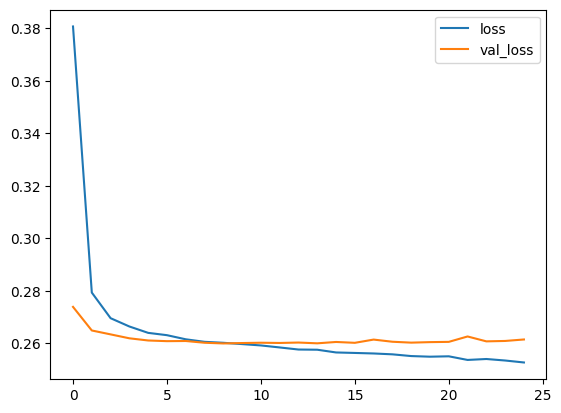

In [ ]:
losses.plot()

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
pred = model.predict(X_test)

9881/9881 [==============================] - 19s 2ms/step


In [ ]:
print(classification_report(y_test,np.round(pred)))
print(confusion_matrix(y_test,np.round(pred)))

              precision    recall  f1-score   support

           0       0.94      0.46      0.62     62036
           1       0.88      0.99      0.93    254140

    accuracy                           0.89    316176
   macro avg       0.91      0.73      0.78    316176
weighted avg       0.89      0.89      0.87    316176

[[ 28422  33614]
 [  1703 252437]]


In [ ]:
np.round(pred)

In [ ]:
pred[0]